<a href="https://colab.research.google.com/github/Srijan545/Web-Scraping-Egmark-site/blob/master/Bank_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bank Churn Model Using Ml

In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import Data
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

In [4]:
#Analyse Data
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.duplicated('CustomerId').sum()

0

In [8]:
df=df.set_index('CustomerId')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [10]:
df.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [11]:
# Encoding
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [15]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [16]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [17]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [18]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [19]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [20]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

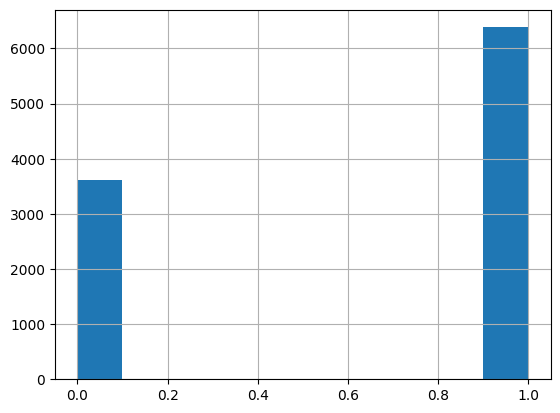

In [21]:
df['Zero Balance'].hist()

In [22]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [23]:
#Define Label And Features
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [24]:
X=df.drop(['Surname','Churn'],axis=1)

In [25]:
y=df['Churn']

In [26]:
X.shape,y.shape

((10000, 11), (10000,))

In [27]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

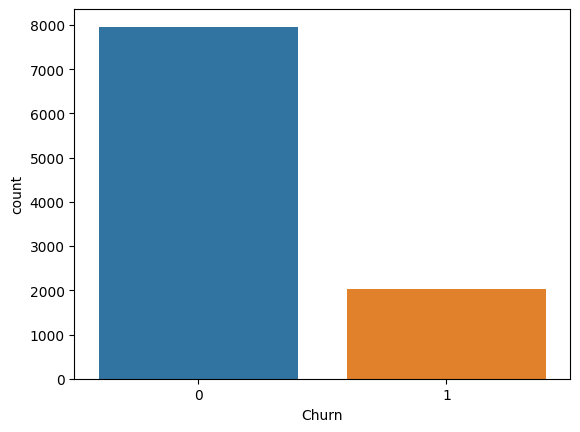

In [28]:
sns.countplot(x ='Churn',data=df);

In [29]:
#Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler

In [30]:
rus = RandomUnderSampler(random_state=2529)

In [31]:
X_rus , y_rus = rus.fit_resample(X,y)

In [32]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [33]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [34]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

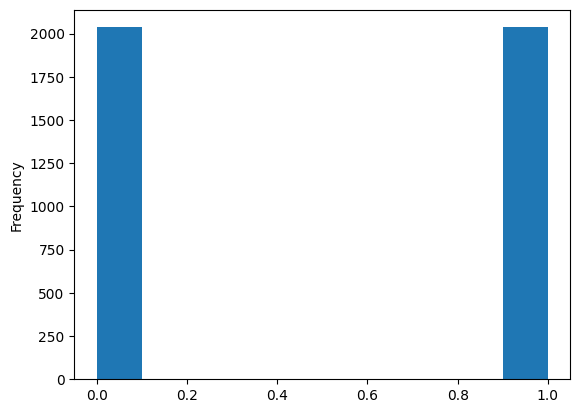

In [35]:
y_rus.plot(kind='hist')

In [36]:
#Random Over Sampling
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros=RandomOverSampler(random_state=2529)

In [38]:
X_ros,y_ros=ros.fit_resample(X,y)

In [39]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [40]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

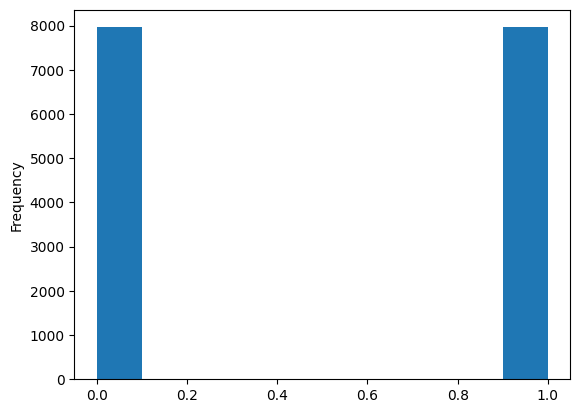

In [41]:
y_ros.plot(kind='hist')

In [42]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [43]:
#Split Orignal Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

In [44]:
#Split Random Under Sample Data
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.3)

In [45]:
#Split Random Over Sample Data

X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.3)

In [46]:
#Standardize Features

from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()

In [48]:
#Standardize Orignal Data

X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [49]:
#Standardize Orignal Data

X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [50]:
#Standardize Random Under Sample Data

X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [51]:
#standardize Random over Sample Data
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [52]:
X_train_rus.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
1620,1.692766,2,0,-0.869127,0.007441,0.833962,1,1,0,-0.177092,1
4019,-1.152834,1,0,0.916631,0.349627,0.744629,1,0,0,-0.350465,1
1900,-1.530207,0,1,0.164733,-0.676929,-1.324979,1,0,1,1.765709,0
2486,1.937549,0,0,1.480555,-0.334744,0.317898,0,1,0,-1.098820,1
14,-0.183902,2,0,2.608402,0.007441,-1.324979,1,1,1,1.456241,0


In [53]:
X_train_ros.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
8776,-0.828506,0,0,0.267945,1.365567,-1.324895,1,1,0,-0.218556,0
7802,1.270724,0,0,2.048963,1.365567,0.484019,0,1,1,-0.124594,1
3603,1.036344,2,1,0.549158,0.680170,0.649914,1,1,0,-0.794833,1
15036,0.801964,1,0,1.580274,-0.005226,0.414603,0,1,0,-1.291083,1
4463,2.055388,1,1,2.705128,-1.376019,0.252457,1,1,0,-0.659294,1


In [54]:
X_test_ros.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
13214,741,2,0,42,6,106036.52,0,1,0,194686.78,1
13577,477,2,1,57,9,114023.64,1,1,1,71167.17,1
6298,714,2,1,52,2,0.00,0,0,1,144045.08,0
14566,687,2,1,61,7,80538.56,0,1,0,131305.37,1
14217,528,1,1,62,7,133201.17,0,0,0,168507.68,1


In [55]:
X_test_rus.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
2090,-1.180035,1,1,0.171664,-0.680180,0.566107,1,1,0,-0.793286,1
2127,-1.036910,0,0,0.550968,-0.680180,0.571088,0,0,0,0.746209,1
2407,0.148985,2,0,-1.535206,-1.372531,1.240070,0,0,0,-1.105980,1
3771,1.171308,1,0,1.783707,1.396873,1.094324,0,1,0,1.553243,1
2424,-0.147489,1,0,-0.207640,1.396873,0.815221,1,0,1,-1.629347,1


In [56]:
#Support Vector Machine Classifier

from sklearn.svm import SVC

In [57]:
svc=SVC()

In [58]:
svc.fit(X_train,y_train)

SVC()

In [59]:
y_pred = svc.predict(X_test)

In [60]:
y_pred=svc.predict(X_test)

In [61]:
#Model Accuracy
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
confusion_matrix(y_test,y_pred)

array([[2374,   45],
       [ 421,  160]])

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [64]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [70]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [71]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [72]:
grid_predictions=grid.predict(X_test)

In [73]:
confusion_matrix(y_test,grid_predictions)

array([[2166,  253],
       [ 365,  216]])

In [74]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



In [75]:
#Model with Random Under Sampling
svc_rus=SVC()

In [76]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [77]:
y_pred_rus=svc_rus.predict(X_test_rus)

In [78]:
#Model Accuracy

confusion_matrix(y_test_rus,y_pred_rus)

array([[463, 143],
       [178, 439]])

In [79]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       606
           1       0.75      0.71      0.73       617

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [80]:
#Hyperparameter Tunning

param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [81]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [82]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [83]:
grid_predictions_rus =grid_rus.predict(X_test_rus)

In [84]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[462, 144],
       [176, 441]])

In [85]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       606
           1       0.75      0.71      0.73       617

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [103]:
#Model with Random Over Sampling
svc_ros=SVC()

In [104]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [105]:
y_pred_ros=svc_ros.predict(X_test_ros)

In [106]:
#Model Accuracy
confusion_matrix(y_test_ros,y_pred_ros)

array([[2361,    0],
       [2417,    0]])

In [107]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      2361
           1       0.00      0.00      0.00      2417

    accuracy                           0.49      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.24      0.49      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
#Hyperparameter Tunning

In [68]:
#Hyperparameter Tunning

param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [87]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [88]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [89]:
grid_predictions_ros=grid_ros.predict(X_test_ros)

In [90]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2361,    0],
       [2417,    0]])

In [91]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      2361
           1       0.00      0.00      0.00      2417

    accuracy                           0.49      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.24      0.49      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
#Lets Compare

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [93]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



In [94]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       606
           1       0.75      0.71      0.73       617

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [95]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       606
           1       0.75      0.71      0.73       617

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [108]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      2361
           1       0.00      0.00      0.00      2417

    accuracy                           0.49      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.24      0.49      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      2361
           1       0.00      0.00      0.00      2417

    accuracy                           0.49      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.24      0.49      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
